Dataset source
https://www.kaggle.com/datasets/fabdelja/autism-screening-for-toddlers 

- A1	Does your child look at you when you call his/her name?
- A2	Does your child look at you when you call his/her name?
- A3    Does your child point to indicate that s/he wants something? (e.g. a toy that is out of reach)
- A4    Does your child point to share interest with you? (e.g. poin9ng at an interes9ng sight)
- A5	Does your child pretend? (e.g. care for dolls, talk on a toy phone) 
- A6	Does your child follow where you’re looking? 
- A7    If you or someone else in the family is visibly upset, does your child show signs of wan9ng to comfort them? (e.g. stroking hair, hugging them)
- A8	Would you describe your child’s first words as: 
- A9	Does your child use simple gestures? (e.g. wave goodbye) 
- A10	Does your child stare at nothing with no apparent purpose? 
- Sex
- Ethnicity
- Born with jaundice (Boolean)
- Family member with ASD (Boolean)
- Who is completing the test (Parent, self, caregiver, medical staff, clinician ,etc.)
- Why_are_you_taken_the_screening	
- Class variable (classification flag, Y or N ASD)


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("Dataset_Kaggle_Toddler.csv")
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [5]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

One hot encoding for categorical features

In [20]:
df['Class']=df['Class/ASD Traits '].astype('category')
df['Class']=df['Class'].cat.codes



In [22]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits,Class
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes,1


In [23]:
data_x = df[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']]
data_y = df['Class']

In [27]:
data_y.shape

(1054,)

In [28]:
data_x.shape

(1054, 10)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)


In [30]:
X_train.shape

(843, 10)

In [31]:
X_test.shape

(211, 10)

In [33]:
y_train.shape

(843,)

In [36]:
y_test.shape

(211,)

In [43]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, random_state=42)  
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)


In [44]:
from sklearn import metrics  
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.990521327014218


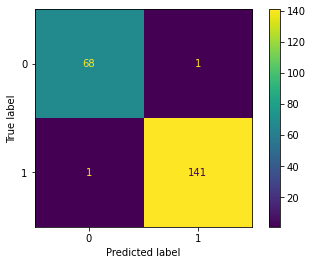

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 4, 6],
              'min_samples_leaf': [1, 2, 3]}

# Create the random forest classifier
rfc = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score:  0.9596435615666385


In [47]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=50)

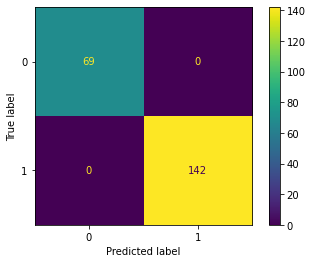

In [49]:
y_pred = grid_search.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [50]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  1.0
